In [3]:
!pip install -q -U watermark

In [4]:
pip install pandas --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression

In [5]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
# versoes dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

seaborn   : 0.11.2
matplotlib: 3.5.2
sklearn   : 1.1.1
numpy     : 1.26.4
pandas    : 1.4.4



In [6]:
# carregando dados do dataset
dados_egov = pd.read_excel('dados/dataset.xlsx')

In [7]:
dados_egov.shape

(17, 16)

In [8]:
# visualiza os dados
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.85074,25.437891,24.98009,5.169123,NaN,NaN,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.40954,27.526983,26.66815,5.344949,NaN,NaN,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,NaN,30.960957,27.46934,5.314364,NaN,NaN,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2006,21.67777,40.938290,25.08140,5.873449,NaN,NaN,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2007,NaN,50.321873,NaN,5.997067,NaN,NaN,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


In [9]:
# tipos de dados
dados_egov.dtypes

ano_coleta                        int64
despesas_educ_percent           float64
despesas_saude_per_capita       float64
despesas_educ_total             float64
despesas_saude_%pib             float64
receita_trib_%pib               float64
receita_excl_doa_%pib           float64
ibrd_e_ida                      float64
pop_cresc_anual%                float64
pib_cresc_per_capita_%pib       float64
pib_deflator                    float64
domestic_saude_despesas_%pib    float64
pib_cresc_anual%                float64
pib_cor_us$                     float64
despesa_nac_bruta_%pib          float64
pib_moeda_local                   int64
dtype: object

In [10]:
# resumo estatístico
dados_egov.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,8.000000,15.000000,13.000000,15.000000,5.000000,5.000000,1.600000e+01,17.000000,17.000000,17.000000,15.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2011.000000,34.776599,55.265036,20.844645,5.555868,16.008023,21.028661,3.667159e+09,2.606996,2.539702,117.186747,1.754343,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,10.632141,17.077696,3.828826,0.412144,0.677579,0.944677,9.532678e+08,0.172462,1.798253,46.934509,0.249802,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2003.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2007.000000,22.976598,45.630081,17.708700,5.266875,15.637825,20.616187,2.946771e+09,2.491937,2.283178,77.789734,1.522404,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2011.000000,41.763410,57.387424,19.252830,5.519421,16.183533,21.199592,3.313021e+09,2.693733,3.045012,113.111372,1.771546,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2015.000000,42.682555,69.282478,24.980090,5.935258,16.256635,21.738908,4.244785e+09,2.739229,3.346252,154.710423,1.950641,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2019.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


In [11]:
# verificando os valores ausentes
dados_egov.isnull().sum()

ano_coleta                       0
despesas_educ_percent            9
despesas_saude_per_capita        2
despesas_educ_total              4
despesas_saude_%pib              2
receita_trib_%pib               12
receita_excl_doa_%pib           12
ibrd_e_ida                       1
pop_cresc_anual%                 0
pib_cresc_per_capita_%pib        0
pib_deflator                     0
domestic_saude_despesas_%pib     2
pib_cresc_anual%                 0
pib_cor_us$                      0
despesa_nac_bruta_%pib           0
pib_moeda_local                  0
dtype: int64

In [12]:
# tratando valores ausentes no banco de dados
# Limpando valores ausentes através de backfilling e interpolação
dados_egov['receita_trib_%pib'].fillna(method = 'bfill', inplace = True)
dados_egov['receita_excl_doa_%pib'].fillna(method = 'bfill', inplace = True)
dados_egov = dados_egov.interpolate()

In [13]:
# verificando novamente valores ausentes
dados_egov.isnull().sum()

ano_coleta                      0
despesas_educ_percent           0
despesas_saude_per_capita       0
despesas_educ_total             0
despesas_saude_%pib             0
receita_trib_%pib               0
receita_excl_doa_%pib           0
ibrd_e_ida                      0
pop_cresc_anual%                0
pib_cresc_per_capita_%pib       0
pib_deflator                    0
domestic_saude_despesas_%pib    0
pib_cresc_anual%                0
pib_cor_us$                     0
despesa_nac_bruta_%pib          0
pib_moeda_local                 0
dtype: int64

In [14]:
# shape do BD (linhas, colunas)
dados_egov.shape

(17, 16)

In [15]:
# removendo a coluna gdp em US$ pois ja temos o valor na moeda local
dados_egov = dados_egov.drop(columns = ['pib_cor_us$'])

In [16]:
dados_egov.shape

(17, 15)

In [17]:
# visualizando os dados
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.850740,25.437891,24.980090,5.169123,16.876979,21.738908,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,111.732648,1131782000000
1,2004,23.409540,27.526983,26.668150,5.344949,16.876979,21.738908,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,110.347249,1274329000000
2,2005,22.543655,30.960957,27.469340,5.314364,16.876979,21.738908,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,110.429285,1415725000000
3,2006,21.677770,40.938290,25.081400,5.873449,16.876979,21.738908,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,109.212364,1862041000000
4,2007,25.852864,50.321873,23.950048,5.997067,16.876979,21.738908,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,109.941251,2151349000000


In [18]:
# arredondando os valores para qautro casas decimais
dados_egov = dados_egov.round(4)

In [19]:
dados_egov.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [20]:
# salvando o dadaset limpo
dados_egov.to_csv('dados/dataset_limpo.csv',index = False)

In [25]:
##################

In [21]:
# carregando o dataset limpo
df = pd.read_csv('dados/dataset_limpo.csv')

In [22]:
# visualizando o dataset
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


<AxesSubplot:xlabel='ano_coleta'>

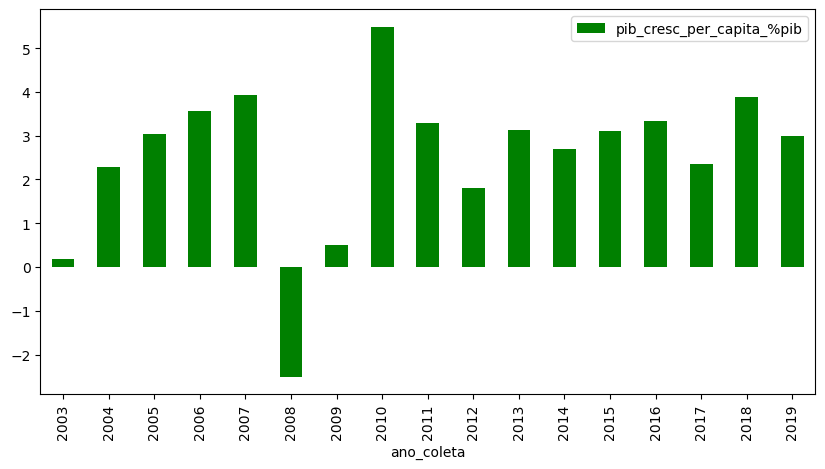

In [24]:
# 1 - em que ano o país teve um alto crescimento do PIB per Capita?
df.plot(x = "ano_coleta", y = ["pib_cresc_per_capita_%pib"], kind = "bar", figsize = (10,5), color = 'green')

In [25]:
# 2 - qual ano teve as maiores despesas com saúde?

# visualizando os dados
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [26]:
# calculando o gasto nacional bruto em relação ao PIB na moeda local
df['gasto_nac_bruto'] = df["despesa_nac_bruta_%pib"] / 100 * df["pib_moeda_local"]

In [32]:
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12


In [27]:
# calculando o gasto total em saude e criamos uma nova variavel
df["gasto_saude"] = df["domestic_saude_despesas_%pib"] / 100 * df["gasto_nac_bruto"]

In [34]:
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10


<AxesSubplot:xlabel='ano_coleta'>

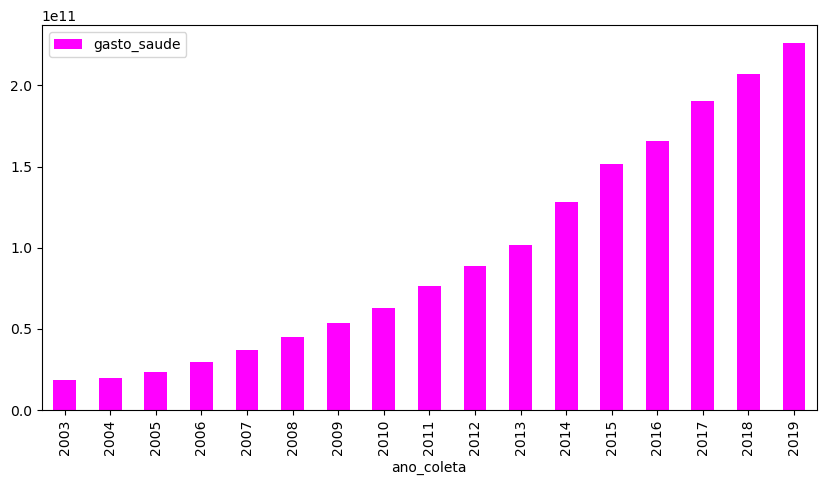

In [28]:
# resposta da pergunta 2
df.plot(x = "ano_coleta", y = ["gasto_saude"], kind = "bar", figsize = (10,5), color = "magenta")

In [29]:
# 3 - qual ano teve os maiores gastos com educação?

# calculando o gasto total em educacao e criamos uma nova variavel
df["gasto_educacao"] = df["despesas_educ_total"] / 100 * df["gasto_nac_bruto"]
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude,gasto_educacao
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10,3.158907e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10,3.750046e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10,4.294482e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10,5.100503e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10,5.664704e+11


<AxesSubplot:xlabel='ano_coleta'>

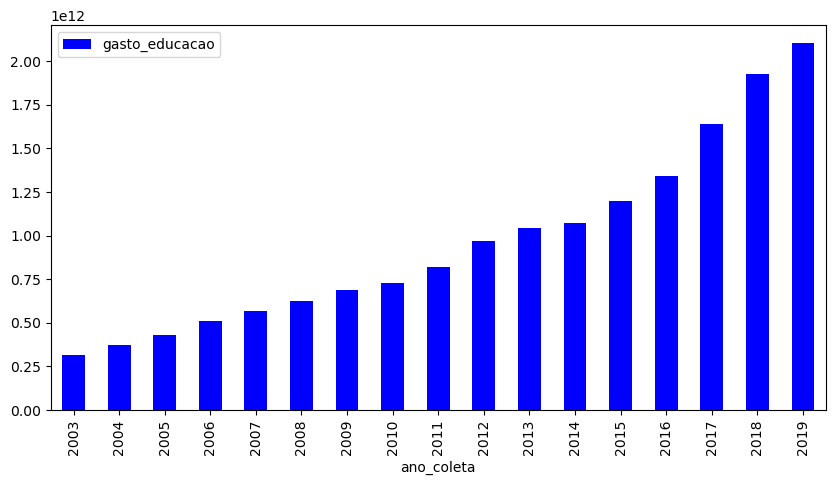

In [40]:
# resposdendo a pergunta 3
# resposta da pergunta 2
df.plot(x = "ano_coleta", y = ["gasto_educacao"], kind = "bar", figsize = (10,5), color = "blue")

<AxesSubplot:>

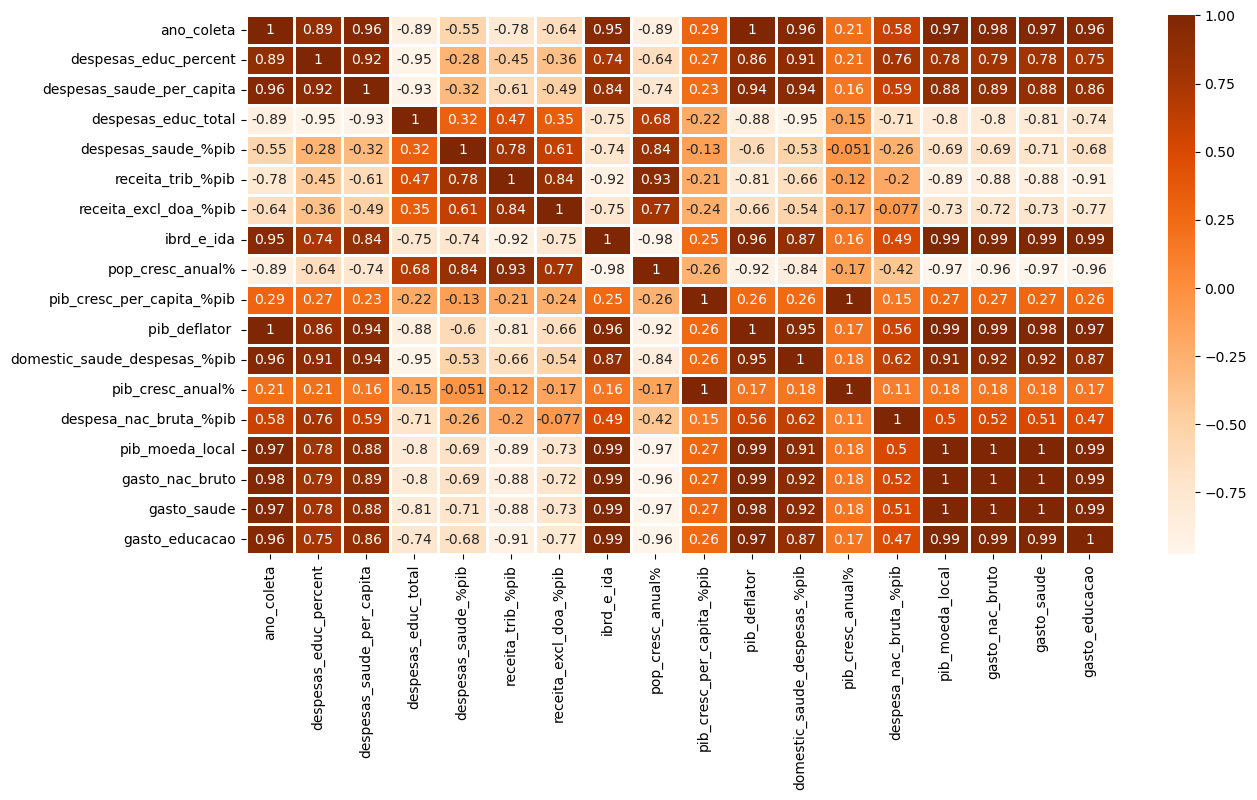

In [41]:
# 4 - como a receita do governo se relaciona com as despesas do governo?

# calcula a correlacao entre as variaveis
# no conjunto de dados usando o metodo de Pearson
df2 = df.corr(method = 'pearson')

# definindo o tamanho do gráfico
plt.figure(figsize = (14,7))

# visualiza correlacao em um mapa de calor (heatmap)
sb.heatmap(
    df2,
    xticklabels = df2.columns,
    yticklabels = df2.columns,
    cmap = 'Oranges',
    annot = True,
    linewidth = 0.8
)

In [43]:

A partir dos resultados da matriz de correlação acima, obtemos as seguintes informações:

Receita de impostos:
    
    - Despesas com saúde(despesas_saude_%pib) tem uma forte correlação com a receita tributária
        do governo (receita_trib_%pib). O coeficiente de correlação é +0,78 o que indica que eles
        são diretamente proporcionais.
    
    - Despesas com educação (despesas_educ_total) tem uma boa correlação com a receita tributária
        (receita_trib_%pib). O coeficiente de é de +0,47 o que indica que são diretamente proporcionais,
        mas não da mesma forma que o da saúde.


Receita de empréstimos do BIRD e Créditos da AID:
    
    - Despesas com saúde(despesas_saude_%pib) tem uma forte correlação com os empréstimos do BIRD e os 
        créditos da AID (ibrd_e_ida). O coeficiente de correlação é +0,74 o que indica que são diretamente
        proporcionais.
        
    - Despesas com educação (despesas_educ_total) tem uma correlação significativamente forte com os
        empréstimos do BIRD e os créditos da AID (ibrd_e_ida). O coeficiente de correlação é +0,75 o que 
        indica que eles são diretamente proporcionais. Também indica que a educação é principalmente 
        financiada por meio dos empréstimos do BIRD e créditos da AID, em oposição à receita fiscal do 
        governo.

SyntaxError: invalid syntax (4183053161.py, line 1)

In [44]:
# 5 - como a educacao e a saude afetam o crescimento do PIB?

In [ ]:
# solucao pergunta 5

Usando a matriz de correlação podemos concluir que:
    
    - Despesas com educação (despesas_educ_total) tem uma correlação negativa com o crescimento do PIB
        per capita (pib_cresc_per_capita_%pib) ao longo dos anos com um coeficiente de -0,22. Isso pode
        ser atribuito principalmente a educação gratuita, portanto, levando a menores gastos com a
        educação por parte dos cidadãos.
        
    - Despesas com saúde (despesas_saude_%pib) também tem uma correlação negativa com o crescimento do PIB
        per capita (pib_cresc_per_capita_%pib) em -0,05 o que significa que são levemente proporcionais.
        Isso se deve aos menores gastos gerais com saúde principalmente devido aos preços mais baixos,
        incluindo preços mais baixos de medicamentos e salários mais baixos para médicos e enfermeiras.

In [30]:
# 6 - Como os gastos do governo com educacao e saude afetam o crescimento do pib?


# criando a variavel total_gastos_educ_saude

df['total_gastos_educ_saude'] = df['gasto_educacao'] + df['gasto_saude']
df.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,gasto_nac_bruto,gasto_saude,gasto_educacao,total_gastos_educ_saude
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.264569e+12,1.882185e+10,3.158907e+11,3.347126e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.406186e+12,1.991160e+10,3.750046e+11,3.949162e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,1.563375e+12,2.318016e+10,4.294482e+11,4.526284e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.033580e+12,2.965976e+10,5.100503e+11,5.397100e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,2.365221e+12,3.681230e+10,5.664704e+11,6.032827e+11


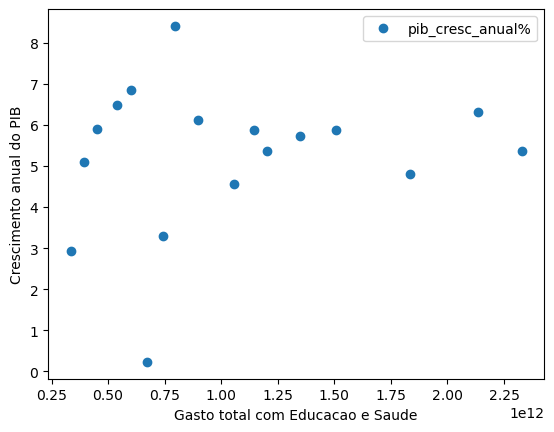

In [34]:
# plot
df.plot(x = 'total_gastos_educ_saude', y = 'pib_cresc_anual%', style = 'o')
plt.xlabel('Gasto total com Educacao e Saude')
plt.ylabel('Crescimento anual do PIB')
plt.show()

In [35]:
# construindo um modelo de regressao

# x é minha variavel independente, variavel de entrada, preditora
# y é minha variavel dependente, variavel de saída

# neste caso que saber o quanto eu invisto em saude e educacao
# qual será o crescimento do PIB

# prepara x e y
x = pd.DataFrame(df['total_gastos_educ_saude'])
y = pd.DataFrame(df['pib_cresc_anual%'])

# cria e treina o modelo
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [36]:
# extraindo o coeficiente
modelo.coef_

array([[5.20791642e-13]])

In [ ]:
# resposta

# Os resultados sugerem que os gastos do governo com educação e saúde afetam positivamente o crescimento do PIB
# Um aumento unitário nas despesas do governo leva a um aumento unitário de 5.20791642e-13 no crescimento do PIB

In [ ]:
# 7 - com base na análise quais sao as recomendacoes aos governantes e gestores?

Educação: 
    * O governo deve garantir o desenvolvimento do capital humano
    * Construir mais escolas, treinar e empregar mais professores para garantir uma educação de qualidade, 
        tornando a educação acessível a todos e reduzindo o custo dela.
    * Isso aumenta o desenvolvimento humano e o crescimento do PIB no longo prazo.
    
Saúde:
    * O governo pode continuar realizando investimentos no setor de saúde, como a compra de equipamentos de
        saúde modernos, construção de mais hospitais, treinamento de mais profissionais de saúde e financiamentos
        de pesquisas e desenvolvimento para combater epidemias.